In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [62]:
digits = datasets.load_digits()

In [80]:
X = digits.data
y = digits.target

mask = y < 11

X = X[mask]
y = y[mask]

In [81]:
y[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [82]:
X.shape

(1797, 64)

In [83]:
y.shape

(1797,)

In [87]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
pca.components_.shape

(4, 64)

In [89]:
Z = pca.transform(X)

In [90]:
Z.shape

(1797, 4)

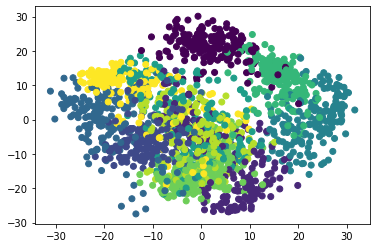

In [91]:
plt.scatter(Z[:,0],Z[:,1],c=y)

In [92]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = Z

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle = True)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

xgb_predict = clf.predict(X_test)

clf.score(X_test, y_test)

0.92

In [93]:
xgb_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

[[12  1]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [74]:
y_test.shape,xgb_predict.shape

((25,), (25,))